<a href="https://colab.research.google.com/github/OliviaHutchison/IMLOProject/blob/main/CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports + Setup

In [1]:
#check for GPU access with PyTorch
import torch
torch.cuda.is_available()

True

In [2]:
#setup DAC
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
#Import PyTorch
import torch
from torch import nn

#Torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor, Resize

#Visualisation
import matplotlib.pyplot as plt

#Version check
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


# Get Dataset

In [4]:
transform = transforms.Compose([
    transforms.RandomAutocontrast(0.75),
    transforms.RandomEqualize(0.5),
    transforms.RandomAdjustSharpness(4, 0.5),
    transforms.RandomPosterize(4, 0.75),
    transforms.GaussianBlur(3),
    transforms.RandomRotation(90),
    ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),(0.5, 0.5, 0.5)),
    Resize((256, 256))
])

In [5]:
#Training Version
train_data= datasets.Flowers102(
    root="data", #where to download to
    split='train', #training dataset
    download=True, #want to download
    transform=transform, #transform data
    target_transform=None #transform labels
)

In [6]:
#Validation
val_data= datasets.Flowers102(
    root="data", #where to download to
    split='val', #training dataset
    download=True, #want to download
    transform=transform, #transform data
    target_transform=None #transform labels
)

In [7]:
#Testing
test_data= datasets.Flowers102(
    root="data", #where to download to
    split='test', #training dataset
    download=True, #want to download
    transform=transform, #transform data
    target_transform=None #transform labels
)

In [8]:
'''
#View Some data
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  randIndex = torch.randint(0, len(train_data), size=[1]).item()
  #print(randIndex)
  image, label = train_data[randIndex]
  fig.add_subplot(rows, cols, i)
  #change dims from colour, height, width to height, width, col
  image = image.permute(1,2,0)
  plt.imshow(image, cmap="gray")
  plt.title(label)
  plt.axis(False);

'''

'\n#View Some data\ntorch.manual_seed(42)\nfig = plt.figure(figsize=(9,9))\nrows, cols = 4, 4\nfor i in range(1, rows*cols+1):\n  randIndex = torch.randint(0, len(train_data), size=[1]).item()\n  #print(randIndex)\n  image, label = train_data[randIndex]\n  fig.add_subplot(rows, cols, i)\n  #change dims from colour, height, width to height, width, col\n  image = image.permute(1,2,0)\n  plt.imshow(image, cmap="gray")\n  plt.title(label)\n  plt.axis(False);\n\n'

# Prep Data

In [9]:
from torch.utils.data import DataLoader

In [10]:
batchSize = 32 #groups of 32 images

#Turn data into iterables
trainDataloader = DataLoader(dataset=train_data,
                             batch_size=batchSize,
                             shuffle=True)

valDataloader = DataLoader(dataset=val_data,
                            batch_size=batchSize,
                            shuffle=False)

testDataloader = DataLoader(dataset=test_data,
                            batch_size=batchSize,
                            shuffle=False)

In [11]:
#trainFeaturesBatch, trainLabelsBatch = next(iter(trainDataloader))
#trainFeaturesBatch.shape


In [12]:
'''
#Show sample
torch.manual_seed(42)
randomIndex = torch.randint(0, len(trainFeaturesBatch), size=[1]).item()
img, label = trainFeaturesBatch[randomIndex], trainLabelsBatch[randomIndex]
img = img.permute(1,2,0)
plt.imshow(img, cmap="gray")
plt.title(label)
plt.axis(False)
'''

'\n#Show sample\ntorch.manual_seed(42)\nrandomIndex = torch.randint(0, len(trainFeaturesBatch), size=[1]).item()\nimg, label = trainFeaturesBatch[randomIndex], trainLabelsBatch[randomIndex]\nimg = img.permute(1,2,0)\nplt.imshow(img, cmap="gray")\nplt.title(label)\nplt.axis(False)\n'

# CNN

In [13]:
#Create CNN
class FlowersModel(nn.Module):
  def __init__(self, inputShape: int, hiddenUnits: int, outputShape: int):
    super().__init__()
    #convolutional block 1 - feature extractor
    self.conv_block1 = nn.Sequential(
        #create conv layer
        nn.Conv2d(in_channels=inputShape, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1), #condv2d for 2d data
        #values we set ourselves in NNs are hyperparameters

        #ReLu Layer
        nn.ReLU(),

        #2nd conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),

        #2 ReLu Layer
        nn.ReLU(),

        #MaxPool Layer
        nn.MaxPool2d(kernel_size=2),
    )
    #convolutional block 2 - feature extractor
    self.conv_block2 = nn.Sequential(
        #conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),
        #ReLu Layer
        nn.ReLU(),

        #2nd conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),

        #2 ReLu Layer
        nn.ReLU(),

        #MaxPool Layer
        nn.MaxPool2d(kernel_size=2),
    )
    #convolutional block 3 - feature extractor
    self.conv_block3 = nn.Sequential(
        #conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),
        #ReLu Layer
        nn.ReLU(),

        #2nd conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),

        #2 ReLu Layer
        nn.ReLU(),

        #MaxPool Layer
        nn.MaxPool2d(kernel_size=2),
    )
    #convolutional block 4 - feature extractor
    self.conv_block4 = nn.Sequential(
        #conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),
        #ReLu Layer
        nn.ReLU(),

        #2nd conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),

        #2 ReLu Layer
        nn.ReLU(),

        #MaxPool Layer
        nn.MaxPool2d(kernel_size=2),
    )
    #convolutional block 5 - feature extractor
    self.conv_block5 = nn.Sequential(
        #conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),
        #ReLu Layer
        nn.ReLU(),

        #2nd conv layer
        nn.Conv2d(in_channels=hiddenUnits, out_channels=hiddenUnits,
                  kernel_size=3, stride=1, padding=1),

        #2 ReLu Layer
        nn.ReLU(),

        #MaxPool Layer
        nn.MaxPool2d(kernel_size=2),
    )
    #classifier layer
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hiddenUnits*64*64,
                  out_features=outputShape)
    )

  #forward
  def forward(self, x):
    x = self.conv_block1(x)
    #print(x.shape)
    x = self.conv_block2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x


In [14]:
model1 = FlowersModel(inputShape=3,
                      hiddenUnits=102,
                      outputShape=102).to(device)
model1

FlowersModel(
  (conv_block1): Sequential(
    (0): Conv2d(3, 102, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(102, 102, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(102, 102, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(102, 102, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block3): Sequential(
    (0): Conv2d(102, 102, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(102, 102, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block4): Sequential(
    (0): Conv2d(102, 102, kernel_size=(3, 3), stri

## Loss and Optimisation

In [15]:
##Loss and Optimiser
lossCalc = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(params=model1.parameters(),
                             lr=0.000001)

## Save Model

# Test and Training

## Setup and functions

In [17]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

### Timer

In [18]:
##Create Timer
from timeit import default_timer as timer
def printTime(start: float, end: float, device: torch.device = None):
    totalTime = end - start
    minutes = totalTime // 60
    print(f"Train time on {device}: {totalTime:.3f} seconds.\n Roughly {minutes} minutes")
    return totalTime

### Accuracy

In [19]:
#Accuaracy Calculator
def accuracyCalc(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### Training

In [20]:
#Training Function
def trainFunction(model: torch.nn.Module,
               dataLoader: torch.utils.data.DataLoader,
               lossCalc: torch.nn.Module,
               optimiser: torch.optim.Optimizer,
               accuracyCalc,
               device: torch.device = device):
    trainLoss, trainAcc = 0, 0
    for batch, (X, y) in enumerate(dataLoader):
        #Send data to GPU
        X, y = X.to(device), y.to(device)

        #Forward pass
        y_pred = model(X)

        #Calculate loss
        loss = lossCalc(y_pred, y)
        trainLoss += loss
        trainAcc += accuracyCalc(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))

        #Optimizer zero grad
        optimiser.zero_grad()

        #Backpropagation
        loss.backward()

        #Optimiser step
        optimiser.step()

    # Calculate loss and accuracy per epoch
    trainLoss /= len(dataLoader)
    trainAcc /= len(dataLoader)
    print(f"Train loss: {trainLoss:.5f} | Train accuracy: {trainAcc:.2f}%")

### Validation

In [21]:
#Validation Function
def valFunction(dataLoader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              lossCalc: torch.nn.Module,
              accuracyCalc,
              device: torch.device = device):
    valLoss, valAcc = 0, 0
    model.eval()
    #Turn on inference context manager
    with torch.inference_mode():
        for X, y in dataLoader:
            #Send data to GPU
            X, y = X.to(device), y.to(device)

            #Forward pass
            val_pred = model(X)

            #Calculate loss and accuracy
            valLoss += lossCalc(val_pred, y)
            valAcc += accuracyCalc(y_true=y,
                y_pred=val_pred.argmax(dim=1)
            )

        #Adjust and display
        valLoss /= len(dataLoader)
        valAcc /= len(dataLoader)
        print(f"Val loss: {valLoss:.5f} | Val accuracy: {valAcc:.2f}%\n")

### Test

In [22]:
#Testing Function
def testFunction(dataLoader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              lossCalc: torch.nn.Module,
              accuracyCalc,
              device: torch.device = device):
    testLoss, testAcc = 0, 0
    model.eval()
    #Turn on inference context manager
    with torch.inference_mode():
        for X, y in dataLoader:
            #Send data to GPU
            X, y = X.to(device), y.to(device)

            #Forward pass
            test_pred = model(X)

            #Calculate loss and accuracy
            testLoss += lossCalc(test_pred, y)
            testAcc += accuracyCalc(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )

        #Adjust and display
        testLoss /= len(dataLoader)
        testAcc /= len(dataLoader)
        print(f"Test loss: {testLoss:.5f} | Test accuracy: {testAcc:.2f}%\n")

## Train and Test

In [24]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
trainTimeStartModel1 = timer()

# Train and test model
epochs = 20
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    trainFunction(dataLoader=trainDataloader,
        model=model1,
        lossCalc=lossCalc,
        optimiser=optimiser,
        accuracyCalc=accuracyCalc,
        device=device
    )
    valFunction(dataLoader=valDataloader,
        model=model1,
        lossCalc=lossCalc,
        accuracyCalc=accuracyCalc,
        device=device
    )


testFunction(dataLoader=testDataloader,
    model=model1,
    lossCalc=lossCalc,
    accuracyCalc=accuracyCalc,
    device=device
)


trainTimeEndModel1 = timer()
totalTrainTime = printTime(start=trainTimeStartModel1,
                           end=trainTimeEndModel1,
                           device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.80720 | Train accuracy: 78.82%
Val loss: 4.23044 | Val accuracy: 27.68%

Epoch: 1
---------
Train loss: 0.67111 | Train accuracy: 80.51%
Val loss: 4.43191 | Val accuracy: 26.44%

Epoch: 2
---------
Train loss: 0.56130 | Train accuracy: 84.89%
Val loss: 4.80678 | Val accuracy: 26.20%

Epoch: 3
---------
Train loss: 0.43576 | Train accuracy: 88.17%
Val loss: 4.76996 | Val accuracy: 27.13%

Epoch: 4
---------
Train loss: 0.41759 | Train accuracy: 88.64%
Val loss: 4.66568 | Val accuracy: 25.96%

Epoch: 5
---------
Train loss: 0.42309 | Train accuracy: 88.24%
Val loss: 5.29077 | Val accuracy: 26.17%

Epoch: 6
---------
Train loss: 0.36441 | Train accuracy: 89.58%
Val loss: 5.16434 | Val accuracy: 25.98%

Epoch: 7
---------
Train loss: 0.32832 | Train accuracy: 90.68%
Val loss: 5.02542 | Val accuracy: 25.40%

Epoch: 8
---------
Train loss: 0.30612 | Train accuracy: 91.16%
Val loss: 5.17084 | Val accuracy: 27.83%

Epoch: 9
---------
Train loss: 0.28155 | Train

## Save Model

1. `torch.save()` - saving and loading object, save in pythons's pickle format

2. `torch.load()` - load with pickle

3. `torch.nn.Module.load_state_dict()` - load models saved state dictionary

In [25]:
torch.save(model1.state_dict(), './CNNModel.pth')

### Predictions


In [28]:
def makePredictions(model: torch.nn.Module,
                    data: list,
                    device: torch.device = device):
  predProbs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prep sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      #forward pass
      predLogit = model(sample)

      #prediction prob
      predProb = torch.softmax(predLogit.squeeze(), dim=0)

      #Get pred prob off GPU
      predProbs.append(predProb.cpu())
  #Stack all
  return torch.stack(predProbs)


In [26]:
import random
random.seed(42)
testSamples = []
testLabels= []
for sample, label in random.sample(list(test_data), k=9):
  testSamples.append(sample)
  testLabels.append(label)



In [29]:
#Make predictions
predProbs = makePredictions(model=model1,
                            data=testSamples)

predProbs[:10]

tensor([[1.1582e-28, 3.2975e-25, 3.8754e-31, 3.0658e-19, 1.7064e-11, 2.4946e-07,
         6.3053e-39, 1.1795e-16, 1.4147e-27, 3.1703e-41, 3.6082e-06, 7.9125e-35,
         1.7611e-19, 2.4834e-27, 7.7147e-32, 3.2216e-33, 2.6222e-06, 9.1266e-05,
         4.8787e-33, 8.3316e-21, 2.7867e-13, 1.8557e-24, 8.8129e-09, 1.3400e-03,
         3.0898e-37, 9.9127e-01, 2.3202e-09, 1.4850e-25, 4.5120e-19, 1.4363e-20,
         3.1132e-12, 8.4228e-16, 4.2419e-24, 5.5936e-19, 0.0000e+00, 5.6575e-12,
         5.5569e-31, 1.2854e-21, 1.5972e-13, 7.5921e-08, 5.4711e-04, 9.4069e-39,
         5.5909e-12, 3.4641e-07, 4.1456e-13, 1.1081e-08, 4.0361e-20, 1.1484e-32,
         9.3213e-30, 2.3664e-37, 2.9971e-30, 3.3281e-17, 2.2618e-06, 1.5171e-17,
         6.8098e-30, 1.7289e-13, 4.0397e-13, 2.6161e-08, 7.7020e-22, 5.8720e-22,
         1.9512e-13, 1.7028e-24, 7.7826e-25, 0.0000e+00, 8.5650e-33, 9.5771e-22,
         2.0603e-26, 5.0213e-08, 1.0572e-34, 6.8605e-33, 1.6265e-07, 6.4757e-14,
         7.6362e-14, 9.7197e

In [30]:
#Convert to labels
predClass = predProbs.argmax(dim=1)

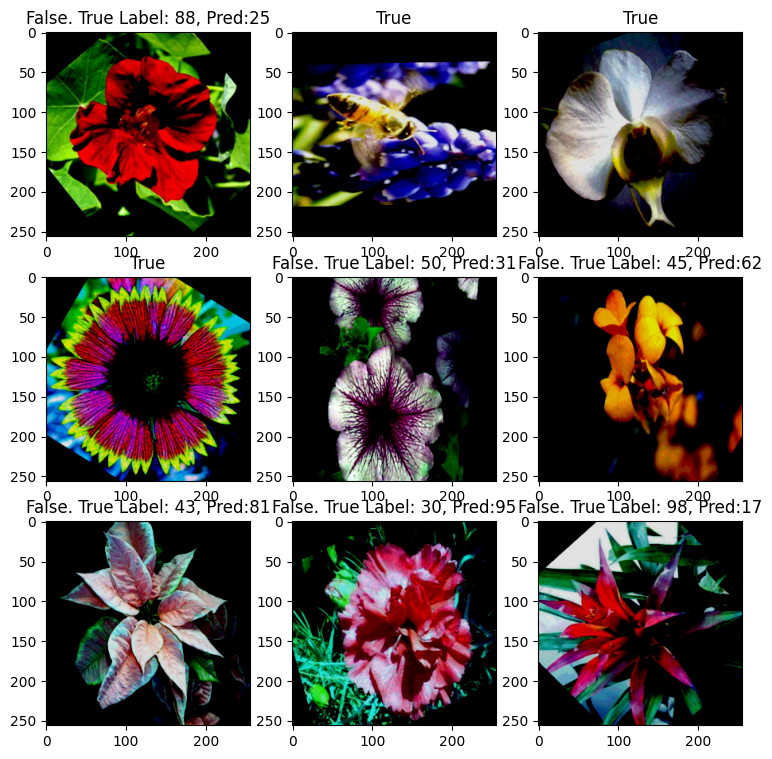

In [34]:
plt.figure(figsize=(9,9))
nrows= 3
ncols = 3
for i, sample in enumerate(testSamples):
  plt.subplot(nrows, ncols, i+1)

  changedSample = sample.permute(1,2,0)
  plt.imshow(changedSample.squeeze())

  #Pred label
  predLabel = predClass[i]
  #Get truth label
  truthLabel = testLabels[i]

  #check for equality
  if truthLabel == predLabel:
    plt.title("True")
  else:
    plt.title(f"False. True Label: {truthLabel}, Pred:{predLabel}")

# End

Chris says mess with:
* Hyperparameters
* Transforms (as many as POSSIBLE :D)
* Optimisers (learning rate, weight decay, etc.)